In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

## scikit-learn compatible API

Accuracy:  0.803

ROC Curve


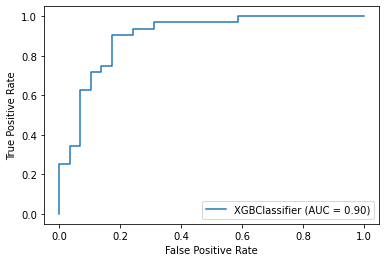

In [3]:
df = pd.read_csv("../data/heart_disease.csv") # Loading the data

X = df.iloc[:,:-1] # Feature matrix in pd.DataFrame format
y = df.iloc[:,-1] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=100,
                            objective='binary:logistic', booster='gbtree',
                            n_jobs=2, random_state=1)

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test) # Predictions
y_true = y_test # True values

print("Accuracy: ", np.round(accuracy_score(y_true, y_pred), 3))
print("\nROC Curve")
print(plot_roc_curve(xgb_clf, X_test, y_test))

In [4]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

## scikit-learn non-compatible API

In [5]:
X = df.iloc[:,:-1] # Feature matrix in pd.DataFrame format
y = df.iloc[:,-1] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

# Creating DMatrices
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Parameter dictionary
params = {'max_depth':4, 'objective':'binary:logistic',
          'n_estimators':100, 'booster':'gbtree'} 

# Train the model with train data sets
xgb_clf = xgb.train(params=params, dtrain=dtrain)

preds = xgb_clf.predict(dtest) # Predictions returns as probabilities
y_pred = [round(value) for value in preds]
y_pred = np.array(y_pred).astype(int) # Predictions returns as classes
y_true = y_test # True values

print("Accuracy: ", np.round(accuracy_score(y_true, y_pred), 3))

[12:41:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:  0.852


## Tree visualization

ImportError: You must install graphviz to plot tree

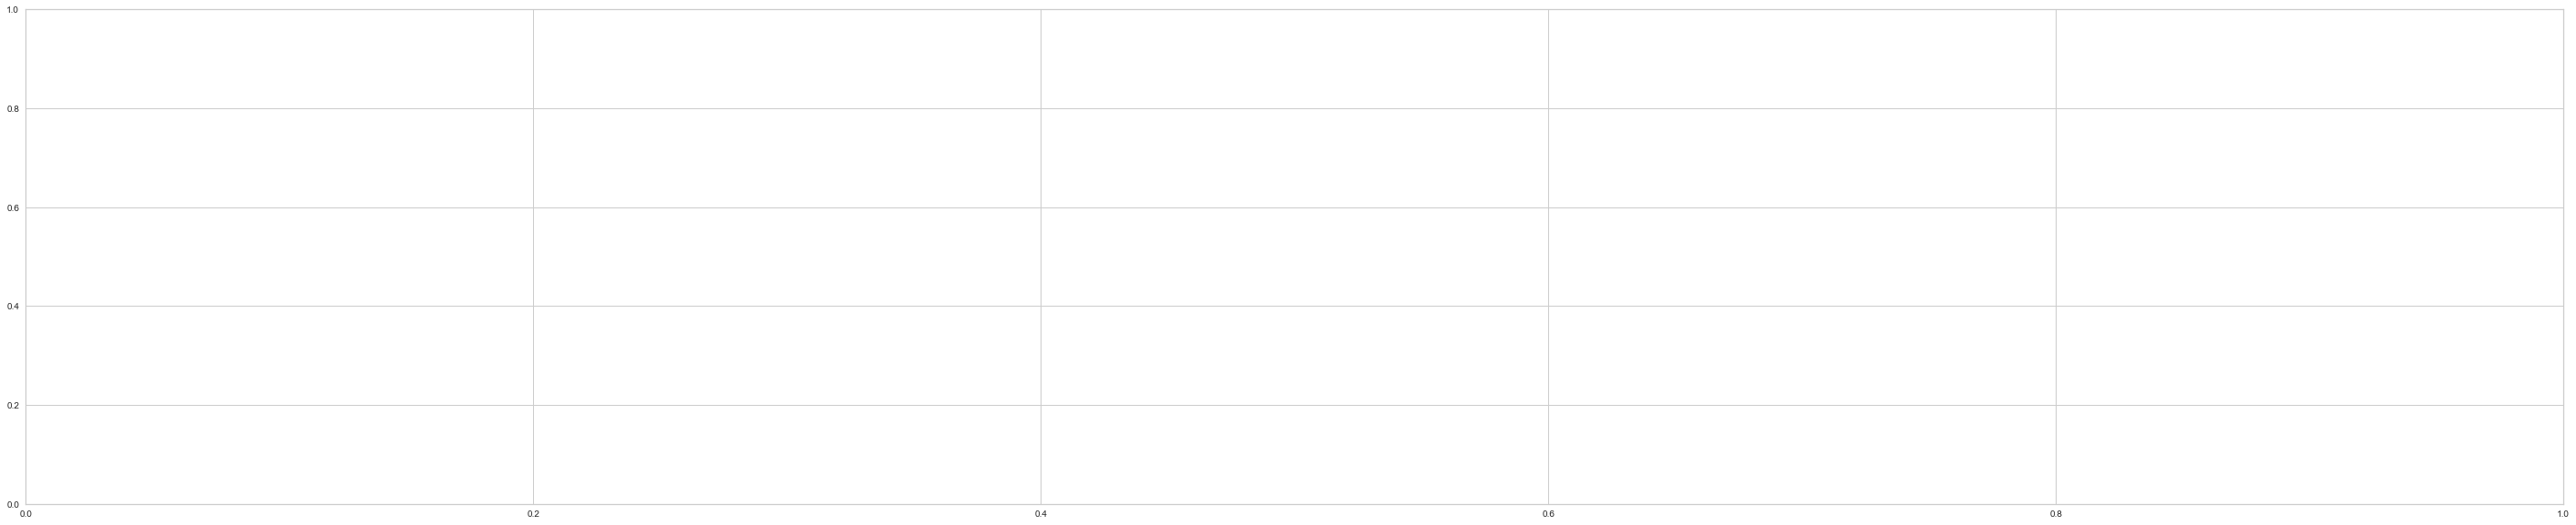

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 10]

xgb.plot_tree(xgb_clf, num_trees=0)
# plt.savefig("Tree.png", dpi=100)

## Regression problem

In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

In [10]:
data = load_boston() # Loading the data

[12:53:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { objectvie } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



RMSE:  2.86

R-Squared:  0.89

Prediction Error Plot


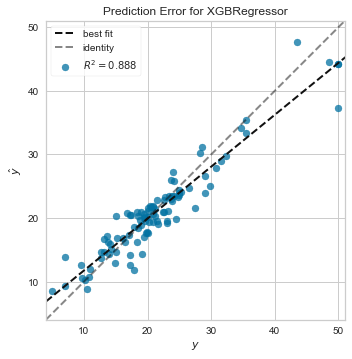

dict_keys(['alpha', 'ax', 'bestfit', 'estimator', 'identity', 'is_fitted', 'shared_limits']) 


dict_keys(['alpha', 'ax', 'bestfit', 'estimator', 'identity', 'is_fitted', 'shared_limits']) 


PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=1, gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.05, max_delta_step=0,
                                       max_depth=3, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=100, n_jobs=2,
                             

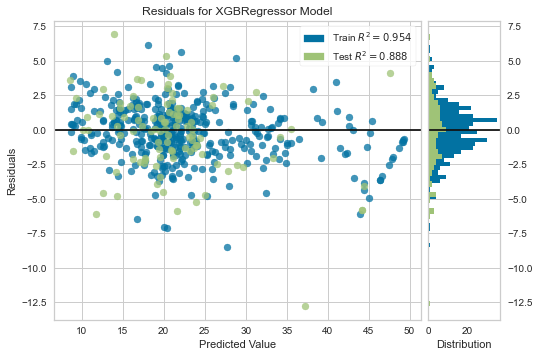

dict_keys(['ax', 'estimator', 'hist', 'is_fitted', 'line_color', 'qqplot', 'test_alpha', 'test_color', 'train_alpha', 'train_color']) 


dict_keys(['ax', 'estimator', 'hist', 'is_fitted', 'line_color', 'qqplot', 'test_alpha', 'test_color', 'train_alpha', 'train_color']) 


ResidualsPlot(ax=<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>,
              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                      

/Users/yuriturygin/opt/anaconda3/envs/xgb/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


In [11]:
X = pd.DataFrame(data.data, columns=data.feature_names) # Feature matrix in pd.DataFrame format
y = pd.Series(data.target) # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train, y_train, X_test, y_test))

## Apply regularization

In [13]:
lambda_values = [1, 10, 50, 100]
for val in lambda_values:
    xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05, reg_lambda=val)


    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)
    y_true = y_test

    MSE = mse(y_true, y_pred)
    RMSE = np.sqrt(MSE)

    R_squared = r2_score(y_true, y_pred)

    print("lambda = ", val)
    print("RMSE: ", np.round(RMSE, 2))
    print("R-Squared: ", np.round(R_squared, 2))
    print()

[12:57:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { objectvie } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


lambda =  1
RMSE:  2.86
R-Squared:  0.89

[12:57:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { objectvie } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


lambda =  10
RMSE:  3.39
R-Squared:  0.84

[12:57:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { objectvie } might not 